Importing modules


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1.
i) What is the shape of the dataset? (specify rows and columns separately)
ii) List the column names and their data types **bold


In [132]:
filename="dataset1_customers.csv"
customer_data = pd.read_csv(filename)
#finding the shape of the dataset
customer_data_shape = customer_data.shape
print("Shape of the dataset:", customer_data_shape)
print("No. of rows:",customer_data.shape[0])
print("No. of columns:",customer_data.shape[1])

Shape of the dataset: (1000, 17)
No. of rows: 1000
No. of columns: 17


Columns and their datatypes


In [133]:
print(customer_data.dtypes)


customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                 float64
address                                 object
postcode                                 int64
state                                   object
country                                 object
property_valuation                     float64
dtype: object


2. Describe the summary statistics, min, max, mean, standard deviation for all numeric columns?


In [134]:
#summary statistics for numeric columns
print("Summary Statistics")
describe=customer_data.describe()
print(describe)
print()
print("MINIMUM OF ALL COLUMNS ARE\n",describe.iloc[[3]])
print()
print("MAXIMUM OF ALL COLUMNS ARE\n",describe.iloc[[7]])
print()
print("MEAN OF ALL COLUMNS ARE\n",describe.iloc[[1]])
print()
print("STANDARD DEVIATION OF ALL COLUMNS ARE\n",describe.iloc[[2]])


Summary Statistics
       customer_id  past_3_years_bike_related_purchases      tenure  \
count  1000.000000                          1000.000000  996.000000   
mean    500.500000                            49.836000   11.391566   
std     288.819436                            27.796686    5.045251   
min       1.000000                             0.000000    0.000000   
25%     250.750000                            26.750000    7.000000   
50%     500.500000                            51.000000   11.000000   
75%     750.250000                            72.000000   15.000000   
max    1000.000000                            99.000000   22.000000   

          postcode  property_valuation  
count  1000.000000          996.000000  
mean   3019.227000            7.393574  
std     848.895767            2.763313  
min    2000.000000            1.000000  
25%    2209.000000            6.000000  
50%    2800.000000            8.000000  
75%    3845.500000            9.000000  
max    4879.0

3.Identify and describe any data quality issues or inconsistencies within the data set. What steps would you take to clean and pre-processes the data to ensure its accuracy for further analysis.


In [135]:
#Check missing values for all columns
for column_name in customer_data.columns:
  print(column_name,":",customer_data[column_name].isna().sum())

customer_id : 0
first_name : 0
last_name : 29
gender : 0
past_3_years_bike_related_purchases : 0
DOB : 17
job_title : 106
job_industry_category : 165
wealth_segment : 0
deceased_indicator : 0
owns_car : 0
tenure : 4
address : 0
postcode : 0
state : 0
country : 0
property_valuation : 4


We see that last name,Dob,job_title,job_industry_catgory have missing values and are strings so we drop missing value rows.

Tenure and property_valuation are integers so we fill them with mean

In [136]:
#for dropping missing values
customer_data = customer_data.dropna(subset=['last_name','DOB','job_title','job_industry_category']).copy()

#filling integer missing values with mean
mean_tenure = customer_data["tenure"].mean()
mean_property_evaluation = customer_data["property_valuation"].mean()
customer_data["tenure"].fillna(mean_tenure, inplace=True)
customer_data["property_valuation"].fillna(mean_property_evaluation, inplace=True)



Dataset is now cleaned and increases accuracy for further analysis

4.
(i) Convert both ‘first_name’ & ‘last_name’ to lower case?
(ii) Join the ‘first name’ and ‘last name’ columns and name it as ‘name’?


In [137]:
customer_data['first_name'] = customer_data['first_name'].str.lower()
customer_data['last_name'] = customer_data['last_name'].str.lower()
print('First names converted to lower case\n')
print(customer_data['first_name'])
print('Last names converted to lower case\n')
customer_data['name'] = customer_data['first_name'] + ' ' + customer_data['last_name']
print('First name and last name combined')
print(customer_data['name'])

First names converted to lower case

0        chickie
1          morly
2        ardelis
3         lucine
4        melinda
         ...    
995    ferdinand
996         burk
997     melloney
998       dickie
999        sylas
Name: first_name, Length: 715, dtype: object
Last names converted to lower case

First name and last name combined
0          chickie brister
1             morly genery
2        ardelis forrester
3             lucine stutt
4           melinda hadlee
              ...         
995    ferdinand romanetti
996           burk wortley
997         melloney temby
998         dickie cubbini
999          sylas duffill
Name: name, Length: 715, dtype: object


5.
Check for any outliers in all numeric columns and then analyze carefully, how they should be addressed.

In [138]:
import pandas as pd
import numpy as np

def find_outliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5 * IQR)
    ul = q3 + (1.5 * IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return bad_indices

def remove_outliers(col, customer_data):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5 * IQR)
    ul = q3 + (1.5 * IQR)

    # Get indices of rows to be dropped
    outlier_indices = customer_data[(col < ll) | (col > ul)].index.tolist()

    # Drop outliers and fill NaN with mean
    customer_data = customer_data.drop(outlier_indices)
    mean_val = col.mean()
    col.fillna(mean_val, inplace=True)

    return customer_data

# Assuming customer_data is your DataFrame
# ... your code to define customer_data...

bad_indexes = []
for col in customer_data.columns:
    if customer_data[col].dtype in ["int64", "float64"]:
        bad_indexes.append(find_outliers(customer_data[col]))

bad_indexes = set(list(np.concatenate(bad_indexes).flat))

print("Rows to be dropped:")
print(bad_indexes)

# Remove outliers and track the changes
for col in customer_data.columns:
    if customer_data[col].dtype in ["int64", "float64"]:
        customer_data = remove_outliers(customer_data[col], customer_data)



Rows to be dropped:
{128.0, 3.0, 144.0, 289.0, 35.0, 683.0, 811.0, 173.0, 46.0, 440.0, 568.0, 325.0, 584.0, 968.0, 203.0, 981.0, 348.0, 739.0, 762.0, 238.0, 377.0, 890.0, 635.0, 126.0, 127.0}


6.Calculate the correlation(heat map) between
i) ‘age’ and ‘past_3_years_bike_related_purchases’
ii) ‘tenure’ and property_valuation’
and comment about the correlation.

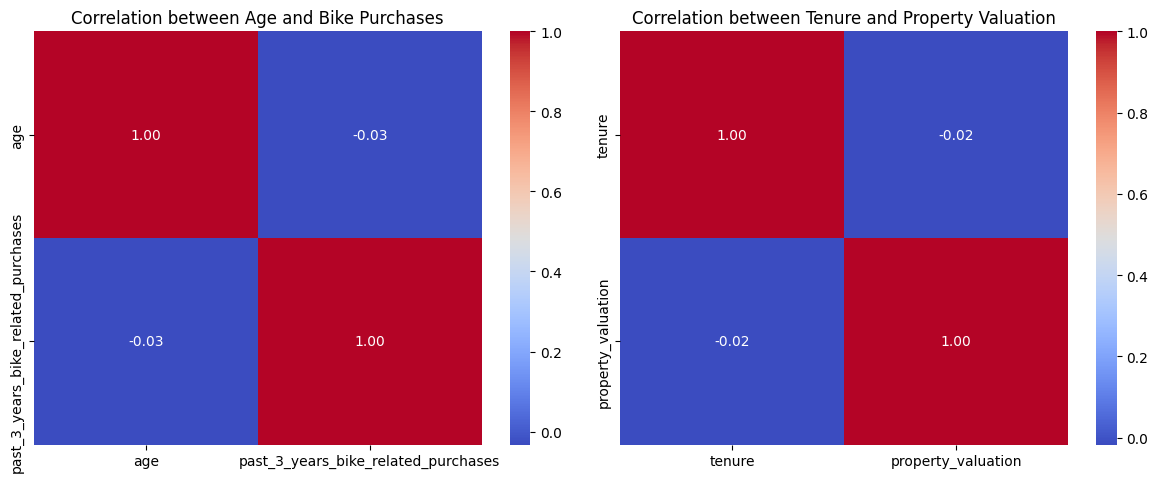

In [139]:
# Convert 'DOB' to 'age'
def calculate_age_from_dob(dob):
    # Function to calculate age from DOB
    # You might need to modify this according to your date format
    # This example assumes date format is 'XX-XX-XXXX' or 'XX/XX/XXXX'
    try:
        birth_year = int(dob[-4:])
        current_year = pd.Timestamp.now().year
        return current_year - birth_year
    except:
        return np.nan

customer_data['age'] = customer_data['DOB'].apply(calculate_age_from_dob)

# Calculate correlations
correlation_age_purchase = customer_data[['age', 'past_3_years_bike_related_purchases']].corr()
correlation_tenure_valuation = customer_data[['tenure', 'property_valuation']].corr()

# Create heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(correlation_age_purchase, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation between Age and Bike Purchases')

sns.heatmap(correlation_tenure_valuation, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation between Tenure and Property Valuation')

plt.tight_layout()
plt.show()

If the correlation coefficient is close to 1, it indicates a strong positive correlation. If close to -1, it
indicates a strong negative correlation.
A positive correlation suggests that as age increases, the past 3 years' bike-related purchases also
tend to increase, and vice versa.
A negative correlation would suggest the opposite.
Tenure and Property Valuation:
Similar to the first case, a positive correlation indicates a tendency for tenure and property valuation
to increase or decrease together.
A negative correlation suggests an inverse relationship between tenure and property valuation

7.
Draw a stacked bar chart where X-axis-> owns car or not and Y-axis-> no.of men and women? (it can be either men on top or women on top)

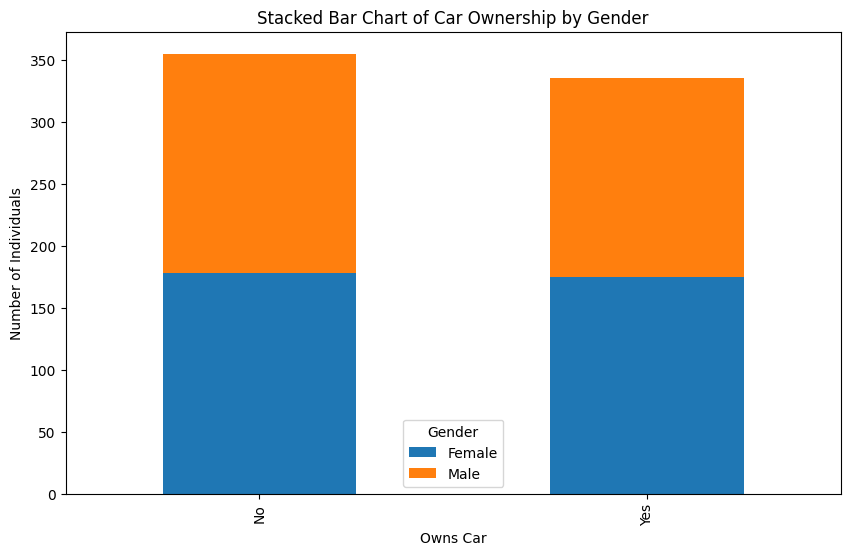

In [140]:
counts = customer_data.groupby(['owns_car', 'gender']).size().unstack()
x = counts.plot(kind='bar', stacked=True, figsize=(10, 6))

x.set_title('Stacked Bar Chart of Car Ownership by Gender')
x.set_xlabel('Owns Car')
x.set_ylabel('Number of Individuals')

x.legend(title='Gender')


plt.show()

8.Draw a histogram where X-axis-> tenure and Y-axis-> no.of customers?(X-axis(tenure) class intervals as 0-5,5-10,10-15,15-20… class size is 5) and indicate the basic insights if any?

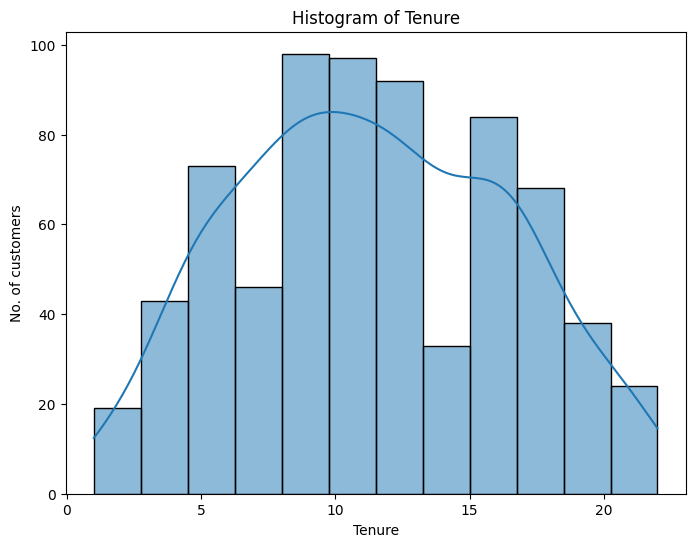

In [156]:
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['tenure'], kde=True)
plt.title('Histogram of Tenure')
plt.xlabel('Tenure')
plt.ylabel('No. of customers')
plt.show()

The histogram is approximately normally distributed based on the fact that it has a single peak and the data is evenly distributed around the peak.

9.Draw bar plots : X-axis vs Y-axis and also indicate any insights can be obtained by taking X-axis vs Y-axis as:
(i) gender vs no.of customers
(ii) job_industry_category vs no.of customers
(iii) wealth_segment vs no.of customers

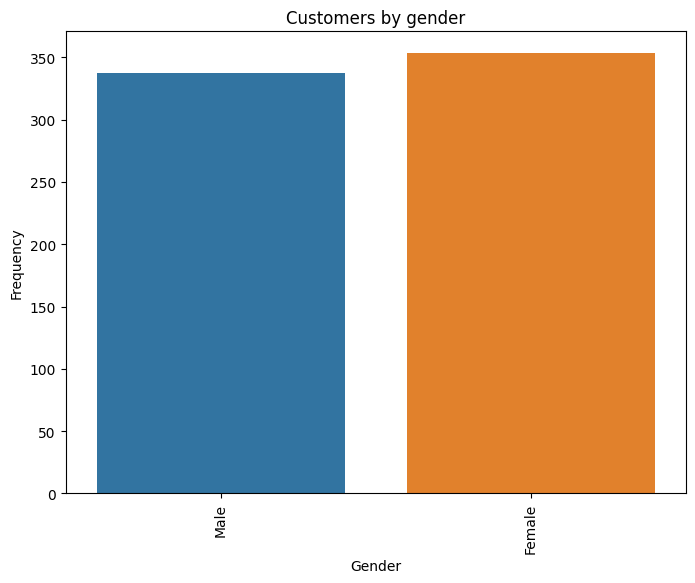

In [142]:
#part1
plt.figure(figsize=(8, 6))
sns.countplot(x=customer_data['gender'], data=customer_data)
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Customers by gender")
plt.xticks(rotation=90)
plt.show()

Number of female customers are more than male customers

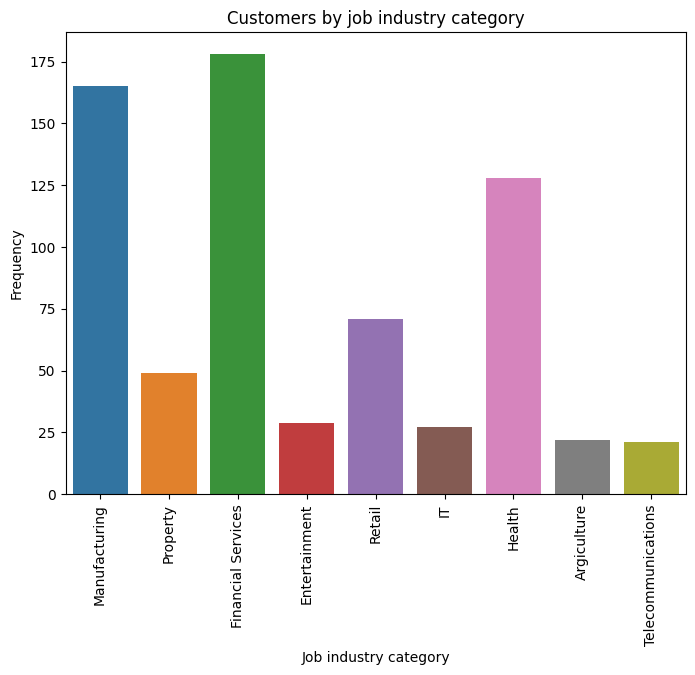

In [143]:
#part2
plt.figure(figsize=(8, 6))
sns.countplot(x=customer_data['job_industry_category'], data=customer_data)
plt.xlabel("Job industry category")
plt.ylabel("Frequency")
plt.title("Customers by job industry category")
plt.xticks(rotation=90)
plt.show()

Financial Services have the most customers whereas Telecommunications have the least customers.

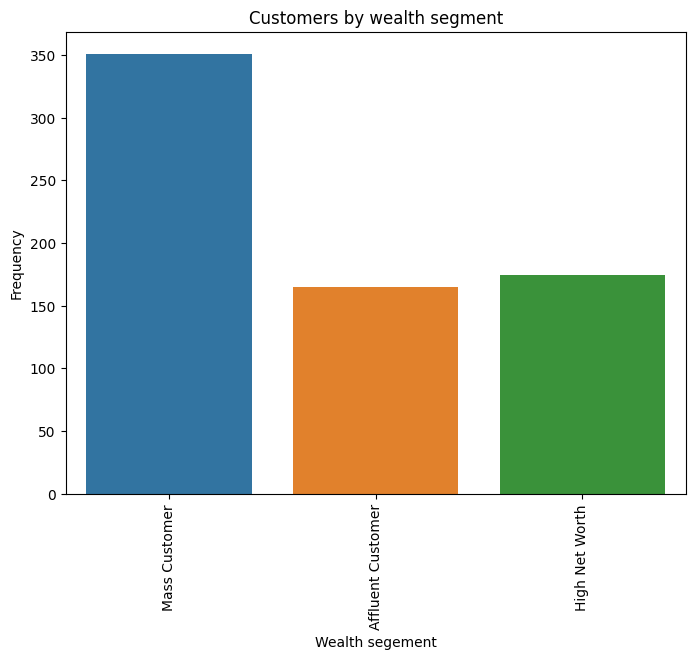

In [144]:
#part3
plt.figure(figsize=(8, 6))
sns.countplot(x=customer_data['wealth_segment'], data=customer_data)
plt.xlabel("Wealth segement")
plt.ylabel("Frequency")
plt.title("Customers by wealth segment")
plt.xticks(rotation=90)
plt.show()

Majority of the customers belong in the mass customer category whereas minority is affluent customers.

10.Draw a normal probability plot on column tenure? Based on the shape and trend of the plot? Is any conclusion can be drawn, if yes what it is?

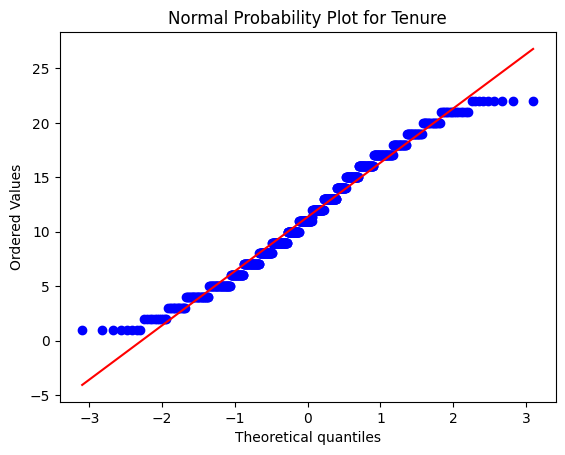

In [157]:
from scipy.stats import probplot

tenure_data = customer_data['tenure']

# Create a normal probability plot
probplot(tenure_data, plot=plt)
plt.title('Normal Probability Plot for Tenure')
plt.show()

 The points on the normal probability plot for the 'tenure' column closely follow the diagonal line, it suggests that the 'tenure' values are approximately normally distributed.This adherence to the diagonal line indicates that the distribution of 'tenure' values is similar to that of a normal distribution. When the points closely align with the diagonal, it implies that the 'tenure' data is consistent with a normal distribution, at least in terms of its quantiles.
